In [41]:
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline

In [42]:
TRAIN_PATH = 'dataset/train/'
TEST_PATH = 'dataset/test/'

In [62]:
train_ds = image_dataset_from_directory(
  TRAIN_PATH,
  seed=123,
  image_size=(224, 224))

print(train_ds.class_names)

Found 640 files belonging to 4 classes.
['caribou', 'deer', 'elk', 'moose']


In [51]:
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    # print(class_names[labels[2]])
    print(labels)

tf.Tensor(
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]], shape=(32, 4), dtype=float32)


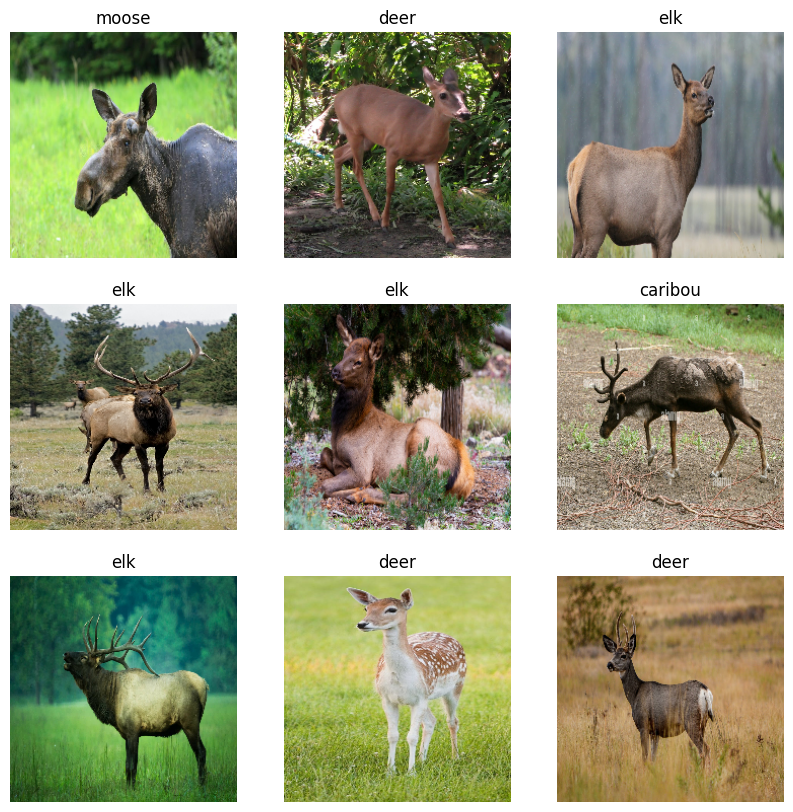

In [4]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

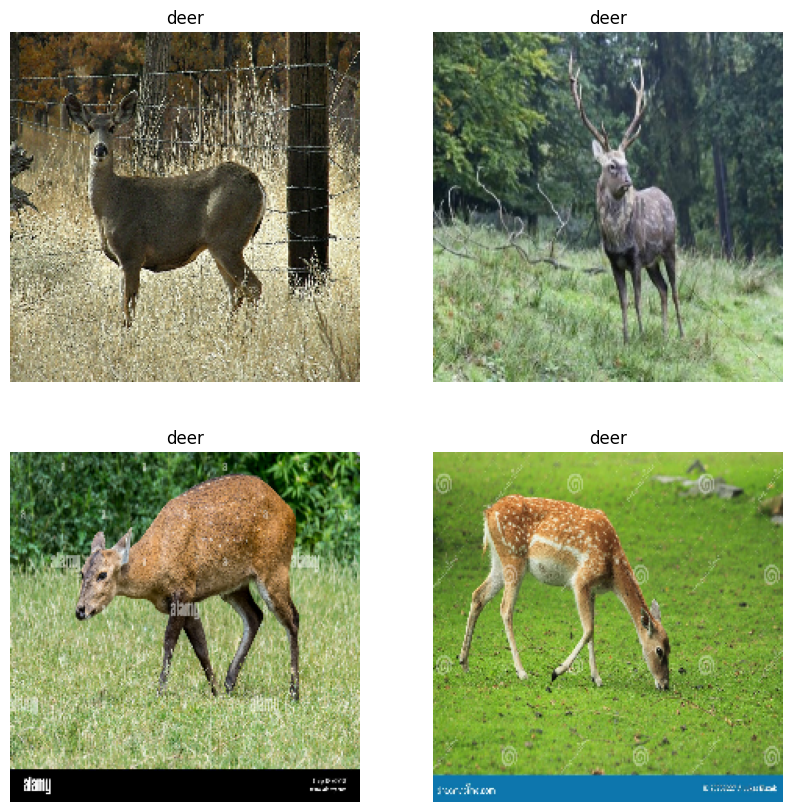

In [5]:
deer_train_ds = train_ds.map(lambda x, y:  (x[y==1], y[y==1]))
plt.figure(figsize=(10, 10))
for images, labels in deer_train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
number_classes = {
'Caribou': len(os.listdir('dataset/train/caribou')),
'Deer': len(os.listdir('dataset/train/deer')),
'Elk': len(os.listdir('dataset/train/elk')),
'Moose': len(os.listdir('dataset/train/moose'))}

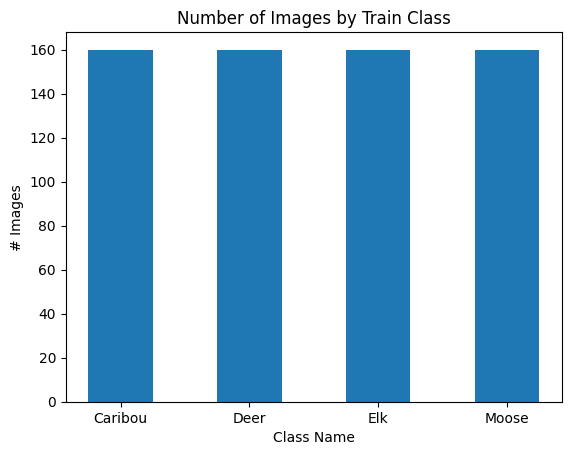

In [10]:
plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Train Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

In [28]:
train_size_images = dict()
for dirpath, _, filenames in os.walk(TRAIN_PATH):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, height = img.size
            train_size_images[path_image] = {'width': width, 'height': height,'path':dirpath}
print(train_size_images)
train_size_images = pd.DataFrame.from_dict(train_size_images,'index')
train_size_images.reset_index(inplace=True)
train_size_images[['folder','subfolder','class']] = train_size_images['path'].str.split('/',n=3,expand=True)

{'female_moose (13).jpg': {'width': 640, 'height': 425, 'path': 'dataset/train/moose'}, 'male_moose (29).jpg': {'width': 1200, 'height': 774, 'path': 'dataset/train/moose'}, 'female_moose (44).jpg': {'width': 800, 'height': 534, 'path': 'dataset/train/moose'}, 'female_moose (52).jpg': {'width': 800, 'height': 534, 'path': 'dataset/train/moose'}, 'male_moose (68).jpg': {'width': 300, 'height': 200, 'path': 'dataset/train/moose'}, 'male_moose (44).jpg': {'width': 300, 'height': 200, 'path': 'dataset/train/moose'}, 'female_moose (29).jpg': {'width': 900, 'height': 600, 'path': 'dataset/train/moose'}, 'male_moose (13).jpg': {'width': 1280, 'height': 720, 'path': 'dataset/train/moose'}, 'male_moose (2).jpg': {'width': 1280, 'height': 853, 'path': 'dataset/train/moose'}, 'female_moose (87).jpg': {'width': 300, 'height': 197, 'path': 'dataset/train/moose'}, 'female_moose (68).jpg': {'width': 300, 'height': 200, 'path': 'dataset/train/moose'}, 'male_moose (52).jpg': {'width': 300, 'height': 16

Text(0.5, 0.98, "Train Dataset Image's Size")

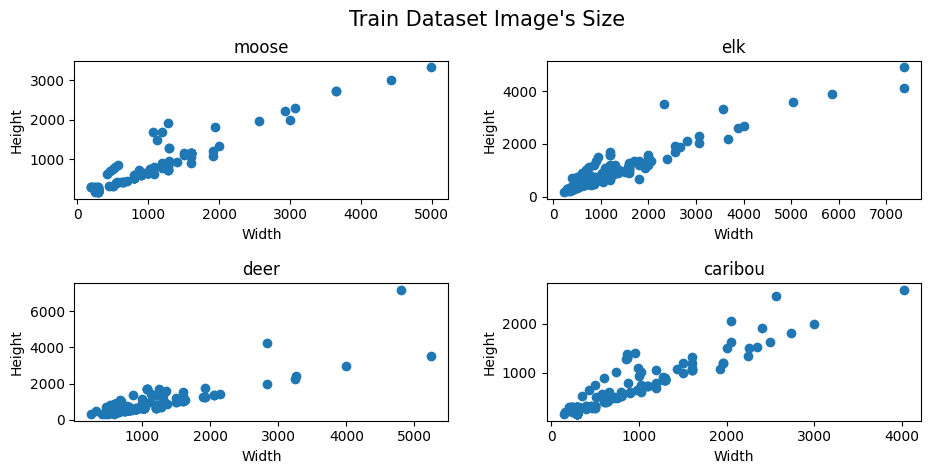

In [29]:
class_lst = list(train_size_images['class'].unique())
fig, ax = plt.subplots(2, 2, figsize = (10, 5))
fig.tight_layout(pad=4.0)
ax = ax.ravel()
for idx,c in enumerate(class_lst,0):
    tempdf = train_size_images.loc[train_size_images['class'] == c]
    ax[idx].plot(tempdf['width'],tempdf['height'],'o')
    ax[idx].set_xlabel('Width')
    ax[idx].set_ylabel('Height')
    ax[idx].set_title(c)
fig.suptitle("Train Dataset Image's Size", fontsize=15)

In [31]:
test_size_images = dict()
for dirpath, _, filenames in os.walk(TEST_PATH):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, height = img.size
            test_size_images[path_image] = {'width': width, 'height': height,'path':dirpath}
print(test_size_images)
test_size_df = pd.DataFrame.from_dict(test_size_images,'index')
test_size_df.reset_index(inplace=True)
test_size_df[['folder','subfolder','class']] = test_size_df['path'].str.split('/',n=3,expand=True)

{'female_moose (100).jpg': {'width': 200, 'height': 300, 'path': 'dataset/test/moose'}, 'male_moose (91).jpg': {'width': 300, 'height': 233, 'path': 'dataset/test/moose'}, 'male_moose (87).jpg': {'width': 300, 'height': 228, 'path': 'dataset/test/moose'}, 'female_moose (91).jpg': {'width': 300, 'height': 200, 'path': 'dataset/test/moose'}, 'female_moose (90).jpg': {'width': 300, 'height': 225, 'path': 'dataset/test/moose'}, 'male_moose (86).jpg': {'width': 300, 'height': 200, 'path': 'dataset/test/moose'}, 'male_moose (90).jpg': {'width': 300, 'height': 197, 'path': 'dataset/test/moose'}, 'female_moose (101).jpg': {'width': 200, 'height': 300, 'path': 'dataset/test/moose'}, 'male_moose (74).jpg': {'width': 300, 'height': 169, 'path': 'dataset/test/moose'}, 'female_moose (106).jpg': {'width': 300, 'height': 200, 'path': 'dataset/test/moose'}, 'male_moose (78).jpg': {'width': 200, 'height': 300, 'path': 'dataset/test/moose'}, 'male_moose (81).jpg': {'width': 300, 'height': 200, 'path': '

Text(0.5, 0.98, "Test Dataset Image's Size")

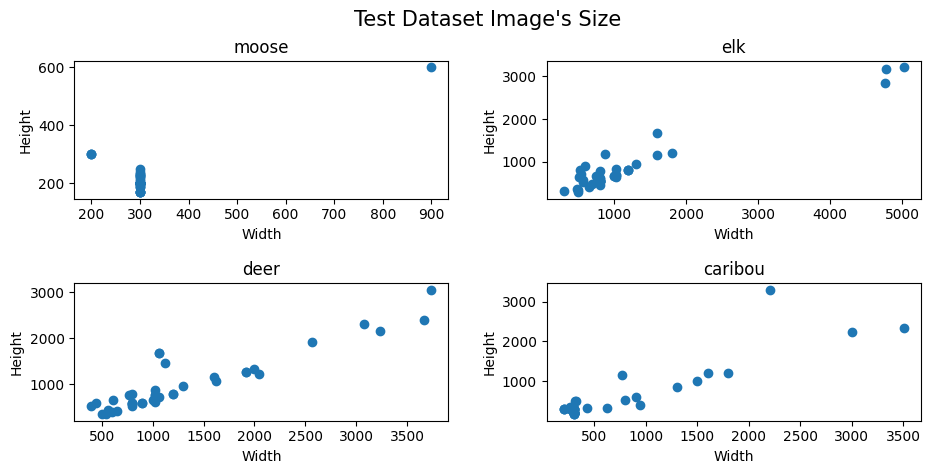

In [32]:
class_lst = list(test_size_df['class'].unique())
fig, ax = plt.subplots(2, 2, figsize = (10, 5))
fig.tight_layout(pad=4.0)
ax = ax.ravel()
for idx,c in enumerate(class_lst,0):
    tempdf = test_size_df.loc[test_size_df['class'] == c]
    ax[idx].plot(tempdf['width'],tempdf['height'],'o')
    ax[idx].set_xlabel('Width')
    ax[idx].set_ylabel('Height')
    ax[idx].set_title(c)
fig.suptitle("Test Dataset Image's Size", fontsize=15)

In [61]:
# Load image
image_path = 'dataset/train/caribou/Female_Caribou26.png'
image = Image.open(image_path)
 
# Convert the image to a numpy array and check its shape
image_array = np.array(image)
print(image_array.shape)

(508, 713)
